In [1]:
from typing import Callable
from os import makedirs
from os.path import join
import numpy as np
import pandas as pd
from verma_net_radiation_sensitivity.verma_net_radiation_sensitivity import process_verma_net_radiation_table
from STIC_sensitivity import process_STIC_table
from sensitivity import perturbed_run
import matplotlib.pyplot as plt

In [2]:
input_df = pd.read_csv("inputs.csv")
input_df = input_df[input_df.fAPARmax != 0]
input_df

,Unnamed: 0.1,tower,lat,lon,orbit,scene,tile,time_UTC_x,date_UTC,doy,...,LWin,LWout,hour_of_day,Topt,fAPARmax,time_UTC_y,LE_insitu,H_insitu,Rn_insitu,G_insitu
0,0,US-Ha2,42.5393,-72.1779,9254,9,18TYN,2020-02-22 16:51:00,2020-02-22,53,...,223.482510,310.837408,19,0.0,0.5545,2020-02-22 17:00:00,23.770000,NaN,NaN,NaN
1,1,US-Ha2,42.5393,-72.1779,10150,9,18TYN,2020-04-20 11:54:00,2020-04-20,111,...,249.470817,483.042043,19,0.0,0.5545,2020-04-20 12:00:00,37.980000,100.200000,128.80,NaN
2,2,US-Ha2,42.5393,-72.1779,10352,9,18TYN,2020-05-03 12:53:00,2020-05-03,124,...,293.358154,368.124775,19,0.0,0.5545,2020-05-03 13:00:00,68.060000,152.300000,261.30,NaN
3,4,US-Ha2,42.5393,-72.1779,11069,8,18TYN,2020-06-18 18:47:00,2020-06-18,170,...,380.029433,454.438012,19,0.0,0.5545,2020-06-18 19:00:00,122.200000,292.500000,657.60,NaN
4,5,US-Ha2,42.5393,-72.1779,11084,9,18TYN,2020-06-19 18:00:00,2020-06-19,171,...,381.598802,422.556648,19,0.0,0.5545,2020-06-19 18:00:00,180.800000,301.500000,757.10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,245,US-xUK,39.0404,-95.1921,8325,8,15SUD,2019-12-24 18:48:00,2019-12-24,358,...,290.082492,339.138760,17,5.8,0.4664,2019-12-24 19:00:00,NaN,112.556080,326.62,8.169
231,246,US-xUK,39.0404,-95.1921,10994,7,15SUD,2020-06-13 22:44:00,2020-06-13,165,...,409.603264,462.335022,17,5.8,0.4664,2020-06-13 22:30:00,NaN,NaN,368.81,17.024
232,247,US-xUK,39.0404,-95.1921,11909,6,15SUD,2020-08-11 23:08:00,2020-08-11,224,...,414.848071,439.377199,17,5.8,0.4664,2020-08-11 23:00:00,131.783751,6.519267,279.97,14.633
233,249,US-xUK,39.0404,-95.1921,16810,8,15SUD,2021-06-23 11:33:00,2021-06-23,174,...,NaN,388.004691,17,5.8,0.4664,2021-06-23 18:00:00,237.726708,187.862743,764.71,16.236


In [13]:
def process_verma_STIC_table(input_df: pd.DataFrame) -> pd.DataFrame:
    df = input_df.copy()
    df["Rn"] = df["Rn_insitu"]

    result = process_STIC_table(
        # process_verma_net_radiation_table(input_df),
        df,
        max_iterations=30,
        use_variable_alpha=True
    )

    return result

In [14]:
# input_df = pd.read_csv("calval_final_50_PTJPL_inputs.csv")

# if "Ta" in input_df and "Ta_C" not in input_df:
#     # input_df.rename({"Ta": "Ta_C"}, inplace=True)
#     input_df["Ta_C"] = input_df["Ta"]

# input_df = input_df[input_df.fAPARmax.apply(lambda fAPARmax: fAPARmax > 0.001)]
# input_df = input_df[input_df.NDVI.apply(lambda NDVI: NDVI > 0.05)]

# np.nanmin(input_df.ST_C), np.nanmax(input_df.ST_C)

In [15]:
processed = process_verma_STIC_table(input_df)
processed

[2024-01-09 19:54:59 INFO] variable Ms min: 0.000 mean: 0.393 max: 1.000 nan: 0.43%
[2024-01-09 19:54:59 INFO] running STIC iteration 1 / 30
[2024-01-09 19:54:59 INFO] using variable Priestley-Taylor alpha with mean: 1.747
[2024-01-09 19:54:59 INFO] completed STIC iteration 1 / 30 with max LE change: 252.916 (0.00 seconds)
[2024-01-09 19:54:59 INFO] variable SM_1 min: 0.006 mean: 0.251 max: 1.000 nan: 0.43%
[2024-01-09 19:54:59 INFO] variable G_1 min: 1.191 mean: 105.130 max: 195.083 nan: 57.02%
[2024-01-09 19:54:59 INFO] variable LE_1 min: 2.437 mean: 284.912 max: 592.844 nan: 57.02%
[2024-01-09 19:54:59 INFO] running STIC iteration 2 / 30
[2024-01-09 19:54:59 INFO] using variable Priestley-Taylor alpha with mean: 2.35
[2024-01-09 19:54:59 INFO] completed STIC iteration 2 / 30 with max LE change: 58.726 (0.00 seconds)
[2024-01-09 19:54:59 INFO] variable SM_2 min: 0.006 mean: 0.255 max: 1.000 nan: 57.02%
[2024-01-09 19:54:59 INFO] variable G_2 min: 1.191 mean: 104.025 max: 193.853 nan:

/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/soil_moisture_initialization.py:59: RuntimeWarning: invalid value encountered in divide
  s44 = (SVP_hPa - Ea_hPa) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/soil_moisture_initialization.py:75: RuntimeWarning: divide by zero encountered in divide
  TdewIndex = (ST_C - Tsd_C) / (Ta_C - Td_C)  # % TdewIndex > 1 signifies super dry condition
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/soil_moisture_iteration.py:78: RuntimeWarning: divide by zero encountered in divide
  TdewIndex = (ST_C - Tsd_C) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/root_zone_iteration.py:53: RuntimeWarning: invalid value encountered in divide
  s44 = (SVP_hPa - Ea_hPa) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/root_zone_iteration.py:54: RuntimeWarning: divide by zero encountered in divide
  kTSTD = (ST_C - Tsd_C) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/S

,Unnamed: 0.1,tower,lat,lon,orbit,scene,tile,time_UTC_x,date_UTC,doy,...,H_insitu,Rn_insitu,G_insitu,LE_max_change,iteration,LE,LE_change,LEt,PT,G
0,0,US-Ha2,42.5393,-72.1779,9254,9,18TYN,2020-02-22 16:51:00,2020-02-22,53,...,NaN,NaN,NaN,1.845633,19,NaN,NaN,NaN,NaN,NaN
1,1,US-Ha2,42.5393,-72.1779,10150,9,18TYN,2020-04-20 11:54:00,2020-04-20,111,...,100.200000,128.80,NaN,1.845633,19,15.590386,0.001787,12.871700,48.090727,26.243946
2,2,US-Ha2,42.5393,-72.1779,10352,9,18TYN,2020-05-03 12:53:00,2020-05-03,124,...,152.300000,261.30,NaN,1.845633,19,190.238188,0.027883,58.883805,195.376604,19.261246
3,4,US-Ha2,42.5393,-72.1779,11069,8,18TYN,2020-06-18 18:47:00,2020-06-18,170,...,292.500000,657.60,NaN,1.845633,19,464.371634,0.288140,286.579164,631.160563,102.837055
4,5,US-Ha2,42.5393,-72.1779,11084,9,18TYN,2020-06-19 18:00:00,2020-06-19,171,...,301.500000,757.10,NaN,1.845633,19,631.211242,0.000000,425.962930,1250.132183,136.928625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,245,US-xUK,39.0404,-95.1921,8325,8,15SUD,2019-12-24 18:48:00,2019-12-24,358,...,112.556080,326.62,8.169,1.845633,19,131.470451,0.000000,0.000000,131.470451,13.373152
231,246,US-xUK,39.0404,-95.1921,10994,7,15SUD,2020-06-13 22:44:00,2020-06-13,165,...,NaN,368.81,17.024,1.845633,19,273.845877,0.407726,173.637401,369.858161,90.740114
232,247,US-xUK,39.0404,-95.1921,11909,6,15SUD,2020-08-11 23:08:00,2020-08-11,224,...,6.519267,279.97,14.633,1.845633,19,221.451990,0.000000,143.018451,387.186028,72.984215
233,249,US-xUK,39.0404,-95.1921,16810,8,15SUD,2021-06-23 11:33:00,2021-06-23,174,...,187.862743,764.71,16.236,1.845633,19,NaN,NaN,NaN,NaN,NaN


In [16]:
processed.columns

Index(['Unnamed: 0.1', 'tower', 'lat', 'lon', 'orbit', 'scene', 'tile',
       'time_UTC_x', 'date_UTC', 'doy', 'time_solar', 'AOT', 'COT',
       'vapor_gccm', 'ozone_cm', 'SZA', 'KG', 'Unnamed: 0', 'lat_Y', 'lon_Y',
       'orbit_Y', 'scene_Y', 'tile_Y', 'time_UTC_Y', 'time_solar_Y',
       'BESSinst', 'ESI', 'ESIdaily', 'ESIdailyUncertainty', 'ETdaily',
       'ETdailyUncertainty', 'ETinstUncertainty', 'EmisWB', 'GPP', 'LST',
       'LST_err', 'MOD16inst', 'NDVI-UQ', 'PET', 'PTJPLSMcanopy',
       'PTJPLSMinst', 'PTJPLSMinterception', 'PTJPLSMsoil', 'RH', 'Rg', 'Rn',
       'SM', 'STICcanopy', 'STICinst', 'Ta', 'WUE', 'albedo-UQ', 'height',
       'radiance_1', 'radiance_2', 'radiance_3', 'radiance_4', 'radiance_5',
       'view_zenith', 'year', 'Ta_C', 'ST_K', 'NDVI', 'albedo', 'ST_C',
       'elevation_km', 'Ra', 'UV', 'VIS', 'NIR', 'VISdiff', 'NIRdiff',
       'VISdir', 'NIRdir', 'SWout', 'LWin', 'LWout', 'hour_of_day', 'Topt',
       'fAPARmax', 'time_UTC_y', 'LE_insitu', 'H_ins

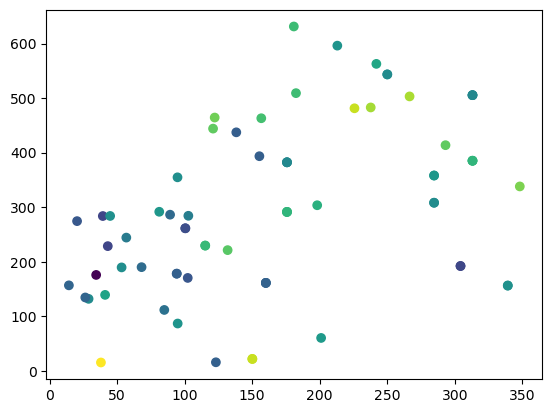

In [20]:
plt.scatter(x=processed.LE_insitu, y=processed.LE, c=processed.ST_C)

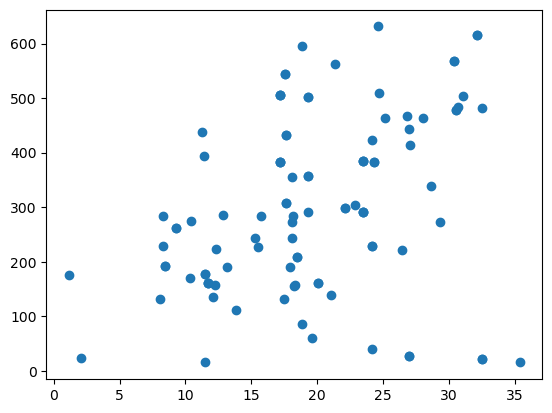

In [25]:
plt.scatter(x=processed.ST_C, y=processed.LE)

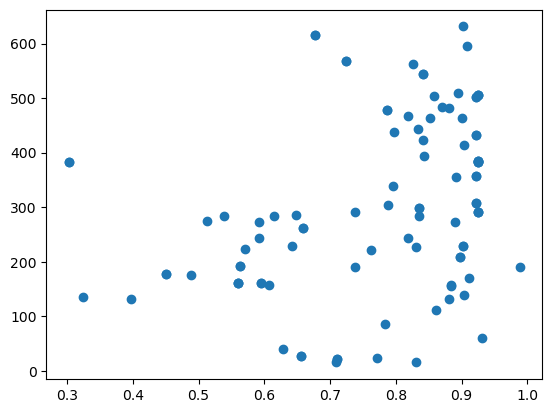

In [24]:
plt.scatter(x=processed.NDVI, y=processed.LE)

In [9]:
input_variable = "LST"
output_variable = "LE"
results = perturbed_run(input_df, input_variable, output_variable, process_verma_STIC_table)
results

[2024-01-09 19:54:30 INFO] variable Ms min: 0.000 mean: 0.393 max: 1.000 nan: 0.43%
[2024-01-09 19:54:30 INFO] running STIC iteration 1 / 3
[2024-01-09 19:54:30 INFO] completed STIC iteration 1 / 3 with max LE change: 252.916 (0.00 seconds)
[2024-01-09 19:54:30 INFO] variable SM_1 min: 0.006 mean: 0.251 max: 1.000 nan: 0.43%
[2024-01-09 19:54:30 INFO] variable G_1 min: 1.191 mean: 105.130 max: 195.083 nan: 57.02%
[2024-01-09 19:54:30 INFO] variable LE_1 min: 2.503 mean: 275.406 max: 560.619 nan: 57.02%
[2024-01-09 19:54:30 INFO] running STIC iteration 2 / 3
[2024-01-09 19:54:30 INFO] completed STIC iteration 2 / 3 with max LE change: 0.201 (0.00 seconds)
[2024-01-09 19:54:30 INFO] variable SM_2 min: 0.006 mean: 0.255 max: 1.000 nan: 0.43%
[2024-01-09 19:54:30 INFO] variable G_2 min: 1.191 mean: 104.694 max: 195.200 nan: 57.02%
[2024-01-09 19:54:30 INFO] variable LE_2 min: 2.503 mean: 275.316 max: 560.453 nan: 57.02%
[2024-01-09 19:54:30 INFO] max LE change 0.201 within convergence targ

/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/soil_moisture_initialization.py:59: RuntimeWarning: invalid value encountered in divide
  s44 = (SVP_hPa - Ea_hPa) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/soil_moisture_initialization.py:75: RuntimeWarning: divide by zero encountered in divide
  TdewIndex = (ST_C - Tsd_C) / (Ta_C - Td_C)  # % TdewIndex > 1 signifies super dry condition
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/soil_moisture_iteration.py:78: RuntimeWarning: divide by zero encountered in divide
  TdewIndex = (ST_C - Tsd_C) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/root_zone_iteration.py:53: RuntimeWarning: invalid value encountered in divide
  s44 = (SVP_hPa - Ea_hPa) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/root_zone_iteration.py:54: RuntimeWarning: divide by zero encountered in divide
  kTSTD = (ST_C - Tsd_C) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/S

[2024-01-09 19:54:30 INFO] variable Ms min: 0.000 mean: 0.374 max: 1.000 nan: 0.43%
[2024-01-09 19:54:30 INFO] running STIC iteration 1 / 3
[2024-01-09 19:54:30 INFO] completed STIC iteration 1 / 3 with max LE change: 1554.992 (0.00 seconds)
[2024-01-09 19:54:30 INFO] variable SM_1 min: 0.000 mean: 0.290 max: 1.000 nan: 0.43%
[2024-01-09 19:54:30 INFO] variable G_1 min: 1.191 mean: 96.819 max: 237.463 nan: 57.02%
[2024-01-09 19:54:30 INFO] variable LE_1 min: 1.005 mean: 244.256 max: 786.545 nan: 57.02%
[2024-01-09 19:54:30 INFO] running STIC iteration 2 / 3
[2024-01-09 19:54:30 INFO] completed STIC iteration 2 / 3 with max LE change: 0.3 (0.01 seconds)
[2024-01-09 19:54:30 INFO] variable SM_2 min: 0.000 mean: 0.293 max: 1.000 nan: 0.43%
[2024-01-09 19:54:30 INFO] variable G_2 min: 1.191 mean: 96.534 max: 237.455 nan: 57.02%
[2024-01-09 19:54:30 INFO] variable LE_2 min: 1.005 mean: 244.196 max: 786.545 nan: 57.02%
[2024-01-09 19:54:30 INFO] max LE change 0.3 within convergence target 2.

/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/soil_moisture_initialization.py:59: RuntimeWarning: invalid value encountered in divide
  s44 = (SVP_hPa - Ea_hPa) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/soil_moisture_initialization.py:75: RuntimeWarning: divide by zero encountered in divide
  TdewIndex = (ST_C - Tsd_C) / (Ta_C - Td_C)  # % TdewIndex > 1 signifies super dry condition
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/soil_moisture_iteration.py:78: RuntimeWarning: divide by zero encountered in divide
  TdewIndex = (ST_C - Tsd_C) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/root_zone_iteration.py:53: RuntimeWarning: invalid value encountered in divide
  s44 = (SVP_hPa - Ea_hPa) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/root_zone_iteration.py:54: RuntimeWarning: divide by zero encountered in divide
  kTSTD = (ST_C - Tsd_C) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/S

,tower,time_solar,LST_unperturbed,LST_perturbation,LST_perturbation_std,LST_perturbed,LE_unperturbed,LE_perturbation,LE_perturbation_std,LE_perturbed
0,US-Ha2,2020-02-21 19:11:17.304,274.04,4.145708,0.713947,278.185708,NaN,NaN,NaN,NaN
1,US-Ha2,2020-02-21 19:11:17.304,274.04,3.713401,0.639497,277.753401,NaN,NaN,NaN,NaN
2,US-Ha2,2020-02-21 19:11:17.304,274.04,-3.532086,-0.608273,270.507914,NaN,NaN,NaN,NaN
3,US-Ha2,2020-02-21 19:11:17.304,274.04,2.670291,0.459860,276.710291,NaN,NaN,NaN,NaN
4,US-Ha2,2020-02-21 19:11:17.304,274.04,-5.356626,-0.922483,268.683374,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
23495,US-xUK,2021-06-22 17:39:13.896,303.86,-1.435513,-0.247215,302.424487,470.17553,22.508453,0.160675,492.683984
23496,US-xUK,2021-06-22 17:39:13.896,303.86,4.555462,0.784512,308.415462,470.17553,-56.941882,-0.406476,413.233648
23497,US-xUK,2021-06-22 17:39:13.896,303.86,-5.788757,-0.996902,298.071243,470.17553,-230.13354,-1.642792,240.041991
23498,US-xUK,2021-06-22 17:39:13.896,303.86,3.989952,0.687123,307.849952,470.17553,-50.870771,-0.363137,419.304760


input variable: LST
output variable: LE
[2024-01-09 19:54:30 INFO] variable Ms min: 0.000 mean: 0.393 max: 1.000 nan: 0.43%
[2024-01-09 19:54:30 INFO] running STIC iteration 1 / 3
[2024-01-09 19:54:30 INFO] completed STIC iteration 1 / 3 with max LE change: 252.916 (0.00 seconds)
[2024-01-09 19:54:30 INFO] variable SM_1 min: 0.006 mean: 0.251 max: 1.000 nan: 0.43%
[2024-01-09 19:54:30 INFO] variable G_1 min: 1.191 mean: 105.130 max: 195.083 nan: 57.02%
[2024-01-09 19:54:30 INFO] variable LE_1 min: 2.503 mean: 275.406 max: 560.619 nan: 57.02%
[2024-01-09 19:54:30 INFO] running STIC iteration 2 / 3
[2024-01-09 19:54:30 INFO] completed STIC iteration 2 / 3 with max LE change: 0.201 (0.00 seconds)
[2024-01-09 19:54:30 INFO] variable SM_2 min: 0.006 mean: 0.255 max: 1.000 nan: 0.43%
[2024-01-09 19:54:30 INFO] variable G_2 min: 1.191 mean: 104.694 max: 195.200 nan: 57.02%
[2024-01-09 19:54:30 INFO] variable LE_2 min: 2.503 mean: 275.316 max: 560.453 nan: 57.02%
[2024-01-09 19:54:30 INFO] max

/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/soil_moisture_initialization.py:59: RuntimeWarning: invalid value encountered in divide
  s44 = (SVP_hPa - Ea_hPa) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/soil_moisture_initialization.py:75: RuntimeWarning: divide by zero encountered in divide
  TdewIndex = (ST_C - Tsd_C) / (Ta_C - Td_C)  # % TdewIndex > 1 signifies super dry condition
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/soil_moisture_iteration.py:78: RuntimeWarning: divide by zero encountered in divide
  TdewIndex = (ST_C - Tsd_C) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/root_zone_iteration.py:53: RuntimeWarning: invalid value encountered in divide
  s44 = (SVP_hPa - Ea_hPa) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/root_zone_iteration.py:54: RuntimeWarning: divide by zero encountered in divide
  kTSTD = (ST_C - Tsd_C) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/S

analysis_CSVs/STIC/STIC_LST_to_LE.csv


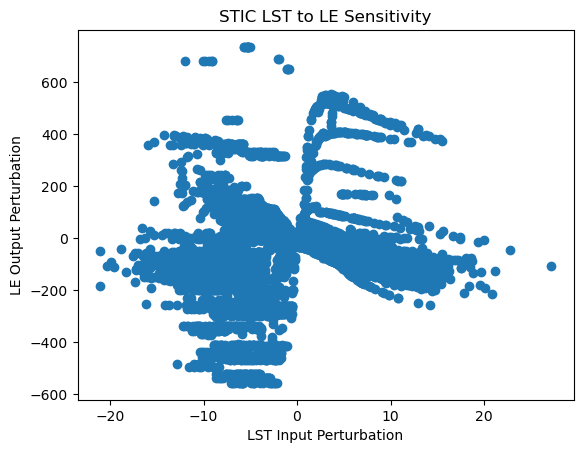

input variable: NDVI
output variable: LE
[2024-01-09 19:54:31 INFO] variable Ms min: 0.000 mean: 0.393 max: 1.000 nan: 0.43%
[2024-01-09 19:54:31 INFO] running STIC iteration 1 / 3
[2024-01-09 19:54:31 INFO] completed STIC iteration 1 / 3 with max LE change: 252.916 (0.00 seconds)
[2024-01-09 19:54:31 INFO] variable SM_1 min: 0.006 mean: 0.251 max: 1.000 nan: 0.43%
[2024-01-09 19:54:31 INFO] variable G_1 min: 1.191 mean: 105.130 max: 195.083 nan: 57.02%
[2024-01-09 19:54:31 INFO] variable LE_1 min: 2.503 mean: 275.406 max: 560.619 nan: 57.02%
[2024-01-09 19:54:31 INFO] running STIC iteration 2 / 3
[2024-01-09 19:54:31 INFO] completed STIC iteration 2 / 3 with max LE change: 0.201 (0.00 seconds)
[2024-01-09 19:54:31 INFO] variable SM_2 min: 0.006 mean: 0.255 max: 1.000 nan: 0.43%
[2024-01-09 19:54:31 INFO] variable G_2 min: 1.191 mean: 104.694 max: 195.200 nan: 57.02%
[2024-01-09 19:54:31 INFO] variable LE_2 min: 2.503 mean: 275.316 max: 560.453 nan: 57.02%
[2024-01-09 19:54:31 INFO] ma

/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/soil_moisture_initialization.py:59: RuntimeWarning: invalid value encountered in divide
  s44 = (SVP_hPa - Ea_hPa) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/soil_moisture_initialization.py:75: RuntimeWarning: divide by zero encountered in divide
  TdewIndex = (ST_C - Tsd_C) / (Ta_C - Td_C)  # % TdewIndex > 1 signifies super dry condition
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/soil_moisture_iteration.py:78: RuntimeWarning: divide by zero encountered in divide
  TdewIndex = (ST_C - Tsd_C) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/root_zone_iteration.py:53: RuntimeWarning: invalid value encountered in divide
  s44 = (SVP_hPa - Ea_hPa) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/root_zone_iteration.py:54: RuntimeWarning: divide by zero encountered in divide
  kTSTD = (ST_C - Tsd_C) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/S

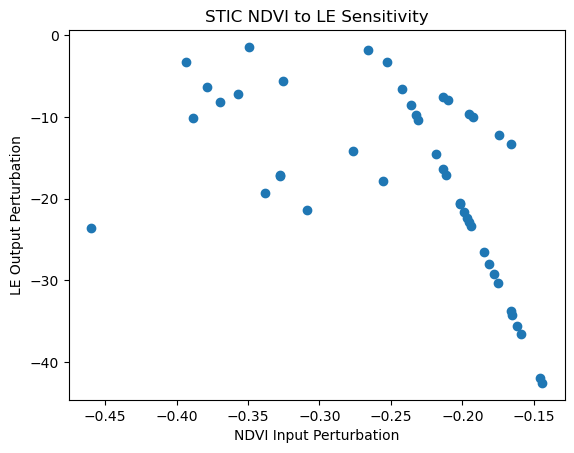

input variable: albedo
output variable: LE
[2024-01-09 19:54:31 INFO] variable Ms min: 0.000 mean: 0.393 max: 1.000 nan: 0.43%
[2024-01-09 19:54:31 INFO] running STIC iteration 1 / 3
[2024-01-09 19:54:31 INFO] completed STIC iteration 1 / 3 with max LE change: 252.916 (0.00 seconds)


/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/soil_moisture_initialization.py:59: RuntimeWarning: invalid value encountered in divide
  s44 = (SVP_hPa - Ea_hPa) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/soil_moisture_initialization.py:75: RuntimeWarning: divide by zero encountered in divide
  TdewIndex = (ST_C - Tsd_C) / (Ta_C - Td_C)  # % TdewIndex > 1 signifies super dry condition
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/soil_moisture_iteration.py:78: RuntimeWarning: divide by zero encountered in divide
  TdewIndex = (ST_C - Tsd_C) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/root_zone_iteration.py:53: RuntimeWarning: invalid value encountered in divide
  s44 = (SVP_hPa - Ea_hPa) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/root_zone_iteration.py:54: RuntimeWarning: divide by zero encountered in divide
  kTSTD = (ST_C - Tsd_C) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/S

[2024-01-09 19:54:31 INFO] variable SM_1 min: 0.006 mean: 0.251 max: 1.000 nan: 0.43%
[2024-01-09 19:54:31 INFO] variable G_1 min: 1.191 mean: 105.130 max: 195.083 nan: 57.02%
[2024-01-09 19:54:31 INFO] variable LE_1 min: 2.503 mean: 275.406 max: 560.619 nan: 57.02%
[2024-01-09 19:54:31 INFO] running STIC iteration 2 / 3
[2024-01-09 19:54:31 INFO] completed STIC iteration 2 / 3 with max LE change: 0.201 (0.00 seconds)
[2024-01-09 19:54:31 INFO] variable SM_2 min: 0.006 mean: 0.255 max: 1.000 nan: 0.43%
[2024-01-09 19:54:31 INFO] variable G_2 min: 1.191 mean: 104.694 max: 195.200 nan: 57.02%
[2024-01-09 19:54:31 INFO] variable LE_2 min: 2.503 mean: 275.316 max: 560.453 nan: 57.02%
[2024-01-09 19:54:31 INFO] max LE change 0.201 within convergence target 2.0 with 2 iterations
[2024-01-09 19:54:31 INFO] variable Ms min: 0.000 mean: 0.393 max: 1.000 nan: 0.43%
[2024-01-09 19:54:31 INFO] running STIC iteration 1 / 3
[2024-01-09 19:54:31 INFO] completed STIC iteration 1 / 3 with max LE change

/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/soil_moisture_initialization.py:59: RuntimeWarning: invalid value encountered in divide
  s44 = (SVP_hPa - Ea_hPa) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/soil_moisture_initialization.py:75: RuntimeWarning: divide by zero encountered in divide
  TdewIndex = (ST_C - Tsd_C) / (Ta_C - Td_C)  # % TdewIndex > 1 signifies super dry condition
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/soil_moisture_iteration.py:78: RuntimeWarning: divide by zero encountered in divide
  TdewIndex = (ST_C - Tsd_C) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/root_zone_iteration.py:53: RuntimeWarning: invalid value encountered in divide
  s44 = (SVP_hPa - Ea_hPa) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/root_zone_iteration.py:54: RuntimeWarning: divide by zero encountered in divide
  kTSTD = (ST_C - Tsd_C) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/S

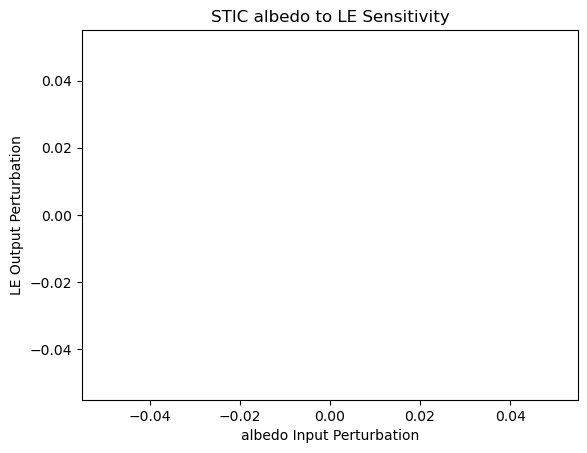

input variable: Ta_C
output variable: LE
[2024-01-09 19:54:31 INFO] variable Ms min: 0.000 mean: 0.393 max: 1.000 nan: 0.43%
[2024-01-09 19:54:31 INFO] running STIC iteration 1 / 3
[2024-01-09 19:54:31 INFO] completed STIC iteration 1 / 3 with max LE change: 252.916 (0.00 seconds)
[2024-01-09 19:54:31 INFO] variable SM_1 min: 0.006 mean: 0.251 max: 1.000 nan: 0.43%
[2024-01-09 19:54:31 INFO] variable G_1 min: 1.191 mean: 105.130 max: 195.083 nan: 57.02%
[2024-01-09 19:54:31 INFO] variable LE_1 min: 2.503 mean: 275.406 max: 560.619 nan: 57.02%
[2024-01-09 19:54:31 INFO] running STIC iteration 2 / 3
[2024-01-09 19:54:31 INFO] completed STIC iteration 2 / 3 with max LE change: 0.201 (0.00 seconds)
[2024-01-09 19:54:31 INFO] variable SM_2 min: 0.006 mean: 0.255 max: 1.000 nan: 0.43%
[2024-01-09 19:54:31 INFO] variable G_2 min: 1.191 mean: 104.694 max: 195.200 nan: 57.02%
[2024-01-09 19:54:31 INFO] variable LE_2 min: 2.503 mean: 275.316 max: 560.453 nan: 57.02%
[2024-01-09 19:54:31 INFO] ma

/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/soil_moisture_initialization.py:59: RuntimeWarning: invalid value encountered in divide
  s44 = (SVP_hPa - Ea_hPa) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/soil_moisture_initialization.py:75: RuntimeWarning: divide by zero encountered in divide
  TdewIndex = (ST_C - Tsd_C) / (Ta_C - Td_C)  # % TdewIndex > 1 signifies super dry condition
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/soil_moisture_iteration.py:78: RuntimeWarning: divide by zero encountered in divide
  TdewIndex = (ST_C - Tsd_C) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/root_zone_iteration.py:53: RuntimeWarning: invalid value encountered in divide
  s44 = (SVP_hPa - Ea_hPa) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/root_zone_iteration.py:54: RuntimeWarning: divide by zero encountered in divide
  kTSTD = (ST_C - Tsd_C) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/S

[2024-01-09 19:54:31 INFO] variable Ms min: 0.000 mean: 0.327 max: 1.000 nan: 0.43%
[2024-01-09 19:54:31 INFO] running STIC iteration 1 / 3
[2024-01-09 19:54:31 INFO] completed STIC iteration 1 / 3 with max LE change: 1561.603 (0.00 seconds)
[2024-01-09 19:54:31 INFO] variable SM_1 min: 0.000 mean: 0.302 max: 1.000 nan: 0.43%
[2024-01-09 19:54:31 INFO] variable G_1 min: 1.191 mean: 94.724 max: 233.768 nan: 57.02%
[2024-01-09 19:54:31 INFO] variable LE_1 min: 0.748 mean: 223.012 max: 786.545 nan: 57.02%
[2024-01-09 19:54:31 INFO] running STIC iteration 2 / 3
[2024-01-09 19:54:31 INFO] completed STIC iteration 2 / 3 with max LE change: 0.258 (0.01 seconds)
[2024-01-09 19:54:31 INFO] variable SM_2 min: 0.000 mean: 0.305 max: 1.000 nan: 0.43%
[2024-01-09 19:54:31 INFO] variable G_2 min: 1.191 mean: 94.435 max: 233.752 nan: 57.02%
[2024-01-09 19:54:31 INFO] variable LE_2 min: 0.745 mean: 222.944 max: 786.545 nan: 57.02%
[2024-01-09 19:54:31 INFO] max LE change 0.258 within convergence targe

/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/soil_moisture_initialization.py:59: RuntimeWarning: invalid value encountered in divide
  s44 = (SVP_hPa - Ea_hPa) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/soil_moisture_initialization.py:75: RuntimeWarning: divide by zero encountered in divide
  TdewIndex = (ST_C - Tsd_C) / (Ta_C - Td_C)  # % TdewIndex > 1 signifies super dry condition
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/soil_moisture_iteration.py:78: RuntimeWarning: divide by zero encountered in divide
  TdewIndex = (ST_C - Tsd_C) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/root_zone_iteration.py:53: RuntimeWarning: invalid value encountered in divide
  s44 = (SVP_hPa - Ea_hPa) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/root_zone_iteration.py:54: RuntimeWarning: divide by zero encountered in divide
  kTSTD = (ST_C - Tsd_C) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/S

analysis_CSVs/STIC/STIC_Ta_C_to_LE.csv


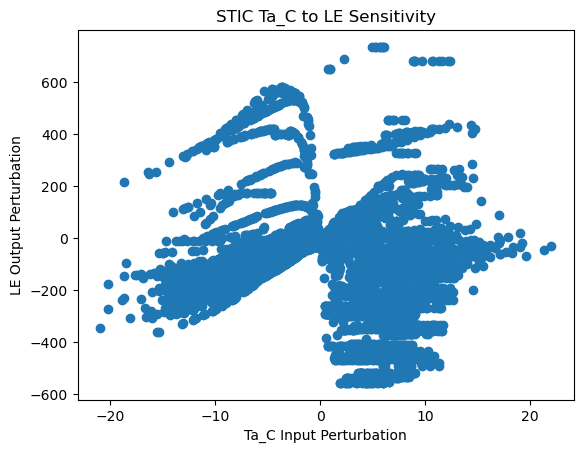

input variable: RH
output variable: LE
[2024-01-09 19:54:31 INFO] variable Ms min: 0.000 mean: 0.393 max: 1.000 nan: 0.43%
[2024-01-09 19:54:31 INFO] running STIC iteration 1 / 3
[2024-01-09 19:54:31 INFO] completed STIC iteration 1 / 3 with max LE change: 252.916 (0.00 seconds)
[2024-01-09 19:54:31 INFO] variable SM_1 min: 0.006 mean: 0.251 max: 1.000 nan: 0.43%
[2024-01-09 19:54:31 INFO] variable G_1 min: 1.191 mean: 105.130 max: 195.083 nan: 57.02%
[2024-01-09 19:54:31 INFO] variable LE_1 min: 2.503 mean: 275.406 max: 560.619 nan: 57.02%
[2024-01-09 19:54:31 INFO] running STIC iteration 2 / 3
[2024-01-09 19:54:31 INFO] completed STIC iteration 2 / 3 with max LE change: 0.201 (0.00 seconds)
[2024-01-09 19:54:31 INFO] variable SM_2 min: 0.006 mean: 0.255 max: 1.000 nan: 0.43%
[2024-01-09 19:54:31 INFO] variable G_2 min: 1.191 mean: 104.694 max: 195.200 nan: 57.02%
[2024-01-09 19:54:31 INFO] variable LE_2 min: 2.503 mean: 275.316 max: 560.453 nan: 57.02%
[2024-01-09 19:54:31 INFO] max 

/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/soil_moisture_initialization.py:59: RuntimeWarning: invalid value encountered in divide
  s44 = (SVP_hPa - Ea_hPa) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/soil_moisture_initialization.py:75: RuntimeWarning: divide by zero encountered in divide
  TdewIndex = (ST_C - Tsd_C) / (Ta_C - Td_C)  # % TdewIndex > 1 signifies super dry condition
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/soil_moisture_iteration.py:78: RuntimeWarning: divide by zero encountered in divide
  TdewIndex = (ST_C - Tsd_C) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/root_zone_iteration.py:53: RuntimeWarning: invalid value encountered in divide
  s44 = (SVP_hPa - Ea_hPa) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/root_zone_iteration.py:54: RuntimeWarning: divide by zero encountered in divide
  kTSTD = (ST_C - Tsd_C) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/S

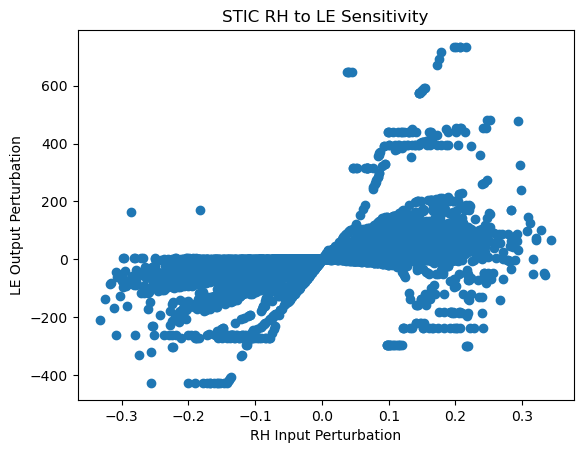

input variable: Rg
output variable: LE
[2024-01-09 19:54:32 INFO] variable Ms min: 0.000 mean: 0.393 max: 1.000 nan: 0.43%
[2024-01-09 19:54:32 INFO] running STIC iteration 1 / 3
[2024-01-09 19:54:32 INFO] completed STIC iteration 1 / 3 with max LE change: 252.916 (0.00 seconds)
[2024-01-09 19:54:32 INFO] variable SM_1 min: 0.006 mean: 0.251 max: 1.000 nan: 0.43%
[2024-01-09 19:54:32 INFO] variable G_1 min: 1.191 mean: 105.130 max: 195.083 nan: 57.02%
[2024-01-09 19:54:32 INFO] variable LE_1 min: 2.503 mean: 275.406 max: 560.619 nan: 57.02%
[2024-01-09 19:54:32 INFO] running STIC iteration 2 / 3
[2024-01-09 19:54:32 INFO] completed STIC iteration 2 / 3 with max LE change: 0.201 (0.00 seconds)
[2024-01-09 19:54:32 INFO] variable SM_2 min: 0.006 mean: 0.255 max: 1.000 nan: 0.43%
[2024-01-09 19:54:32 INFO] variable G_2 min: 1.191 mean: 104.694 max: 195.200 nan: 57.02%
[2024-01-09 19:54:32 INFO] variable LE_2 min: 2.503 mean: 275.316 max: 560.453 nan: 57.02%
[2024-01-09 19:54:32 INFO] max 

/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/soil_moisture_initialization.py:59: RuntimeWarning: invalid value encountered in divide
  s44 = (SVP_hPa - Ea_hPa) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/soil_moisture_initialization.py:75: RuntimeWarning: divide by zero encountered in divide
  TdewIndex = (ST_C - Tsd_C) / (Ta_C - Td_C)  # % TdewIndex > 1 signifies super dry condition
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/soil_moisture_iteration.py:78: RuntimeWarning: divide by zero encountered in divide
  TdewIndex = (ST_C - Tsd_C) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/root_zone_iteration.py:53: RuntimeWarning: invalid value encountered in divide
  s44 = (SVP_hPa - Ea_hPa) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/root_zone_iteration.py:54: RuntimeWarning: divide by zero encountered in divide
  kTSTD = (ST_C - Tsd_C) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/S

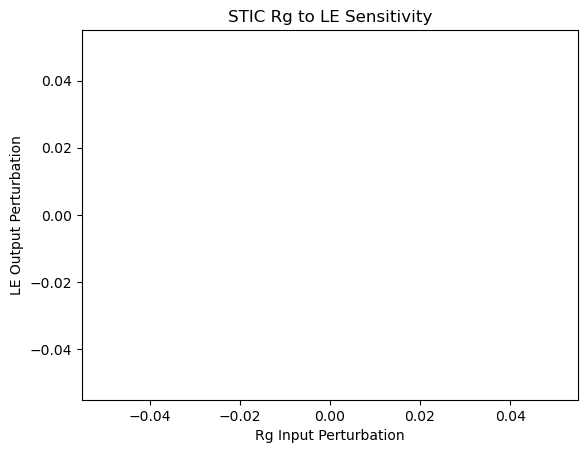

,tower,time_solar,LST_unperturbed,LST_perturbation,LST_perturbation_std,LST_perturbed,LE_unperturbed,LE_perturbation,LE_perturbation_std,LE_perturbed,...,Ta_C_perturbation_std,Ta_C_perturbed,RH_unperturbed,RH_perturbation,RH_perturbation_std,RH_perturbed,Rg_unperturbed,Rg_perturbation,Rg_perturbation_std,Rg_perturbed
0,US-Ha2,2020-02-21 19:11:17.304,274.04,-8.521128,-1.467453,265.518872,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US-Ha2,2020-02-21 19:11:17.304,274.04,-2.035232,-0.350494,272.004768,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US-Ha2,2020-02-21 19:11:17.304,274.04,5.171737,0.890643,279.211737,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US-Ha2,2020-02-21 19:11:17.304,274.04,-0.892759,-0.153745,273.147241,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US-Ha2,2020-02-21 19:11:17.304,274.04,2.450164,0.421951,276.490164,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23395,US-xUK,2021-06-22 17:39:13.896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,260.109914,-2.478482,-0.037826,257.631432
23396,US-xUK,2021-06-22 17:39:13.896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,260.109914,115.437314,1.761758,375.547228
23397,US-xUK,2021-06-22 17:39:13.896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,260.109914,67.484885,1.029928,327.594799
23398,US-xUK,2021-06-22 17:39:13.896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,260.109914,11.088554,0.169229,271.198468


In [10]:
model_name = "STIC"
forward_process = process_verma_STIC_table   
input_variables = ["LST", "NDVI", "albedo", "Ta_C", "RH", "Rg"]
output_variables = ["LE"]

results = []
correlations = []

for input_variable in input_variables:
    for output_variable in output_variables:
        print(f"input variable: {input_variable}")
        print(f"output variable: {output_variable}")
        
        # run forward process with perturbation
        run_results = perturbed_run(input_df, input_variable, output_variable, forward_process)
        run_results = run_results[run_results[f"{output_variable}_perturbed"] != 0]
        run_results = run_results[run_results[f"{output_variable}_perturbation"] != 0]

        if len(run_results) == 0:
            print(f"no relationship between {input_variable} and {output_variable}")
            continue

        directory = join("analysis_CSVs", model_name)
        makedirs(directory, exist_ok=True)
        filename = join(directory, f"{model_name}_{input_variable}_to_{output_variable}.csv")
        print(filename)
        run_results.to_csv(filename, index=False)

        # input_perturbation = np.array(run_results[f"{input_variable}_perturbation_std"])
        input_perturbation = np.array(run_results[f"{input_variable}_perturbation"])
        # print(len(input_perturbation))
        # output_perturbation = np.array(run_results[f"{output_variable}_perturbation_std"])
        output_perturbation = np.array(run_results[f"{output_variable}_perturbation"])
        # print(len(output_perturbation))
        # perturbation_correlation = np.corrcoef(input_perturbation, output_perturbation)[0,1]
        # correlations.append([input_variable, output_variable, perturation_core])

        # create figure and axis objects
        fig, ax = plt.subplots()

        # create scatter plot
        ax.scatter(input_perturbation, output_perturbation)

        # set title and axis labels
        ax.set_title(f"{model_name} {input_variable} to {output_variable} Sensitivity")
        # ax.set_xlabel(f"{input_variable} Input Perturbation Sigma")
        # ax.set_ylabel(f"{output_variable} Output Perturbation Sigma")
        ax.set_xlabel(f"{input_variable} Input Perturbation")
        ax.set_ylabel(f"{output_variable} Output Perturbation")
        # show plot
        plt.show()

        results.append(run_results)

results = pd.concat(results)
# correlations = pd.DataFrame(correlations, columns=["input_variable", "output_variable", "correlation"]) 
# correlations
results

In [11]:
results_std = results[[column for column in results.columns if column.endswith("std")]]
results_std.columns = [column.replace("_perturbation_std", "") for column in results_std.columns]
results_std_corr = results_std.corr().round(2)[["LE"]]
results_std_corr

,LE
LST,0.07
LE,1.00
NDVI,-0.54
albedo,NaN
Ta_C,-0.04
RH,0.52
Rg,NaN


In [12]:
results_std_corr.to_csv('results_std_corr.csv', index=True)